In [2]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('7 (1).csv')
df.shape

(2278, 2)

In [5]:
df.head()

,Time,domain
0,2/2/2022 20:54,mail.google.com
1,2/3/2022 23:23,mail.google.com
2,2/3/2022 23:24,mail.google.com
3,2/7/2022 10:27,www.youtube.com
4,2/7/2022 10:28,umbc.webex.com


In [6]:
df.tail()

,Time,domain
2273,4/17/2022 2:24,github.com
2274,4/17/2022 2:25,github.com
2275,4/17/2022 2:25,localhost:8888
2276,4/17/2022 2:25,github.com
2277,4/17/2022 2:27,github.com


In [7]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [8]:
df.dropna( inplace=True)

In [9]:
df.dtypes

Time      object
domain    object
dtype: object

In [10]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [11]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [12]:
df['Time'] = pd.to_datetime(df['Time'])

In [13]:
# df['domain'] = df['domain'].astype(str)

In [14]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [15]:
df.head()

,Time,domain
0,2022-02-02 20:54:00,mail.google.com
1,2022-02-03 23:23:00,mail.google.com
2,2022-02-03 23:24:00,mail.google.com
3,2022-02-07 10:27:00,www.youtube.com
4,2022-02-07 10:28:00,umbc.webex.com


In [16]:
df['domain'].value_counts()[:60]

www.google.com                     685
webauth.umbc.edu                   177
www.apple.com                      161
github.com                         122
www.amazon.com                     105
localhost:8888                      97
myretrievercare.umbc.edu            67
mail.google.com                     62
blackboard.umbc.edu                 56
secure4.store.apple.com             55
www.calculator.net                  49
campuscard-selfservice.umbc.edu     42
secure2.store.apple.com             41
my.umbc.edu                         36
www.prepostseo.com                  34
docs.google.com                     30
drive.google.com                    23
www.youtube.com                     22
www.lindsey.edu                     20
www.bestbuy.com                     20
appleid.apple.com                   18
umbc.webex.com                      16
vimeo.com                           16
accounts.google.com                 14
www.vibeaccount.com                 12
pandas.pydata.org        

<AxesSubplot:>

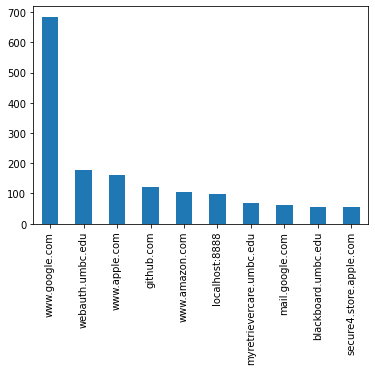

In [17]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [18]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     160
1      97
2      33
3       1
8       7
9      74
10    138
11     86
12    121
13    186
14    184
15    179
16    199
17     75
18      6
19     61
20    268
21    155
22    157
23     91
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

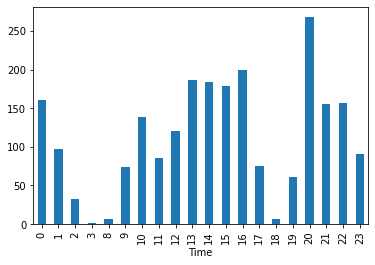

In [19]:
hourly_counts.plot.bar()

In [20]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-02-02 20:54:00,mail.google.com,Wednesday,2
1,2022-02-03 23:23:00,mail.google.com,Thursday,3
2,2022-02-03 23:24:00,mail.google.com,Thursday,3
3,2022-02-07 10:27:00,www.youtube.com,Monday,0
4,2022-02-07 10:28:00,umbc.webex.com,Monday,0


In [21]:
df['Day'].value_counts()

Tuesday      697
Wednesday    493
Thursday     366
Sunday       266
Saturday     204
Friday       175
Monday        77
Name: Day, dtype: int64

In [22]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0     77
1    697
2    493
3    366
4    175
5    204
6    266
Name: DayIndex, dtype: int64

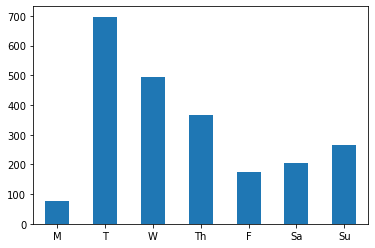

In [23]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [24]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-02-02 20:54:00,mail.google.com,Wednesday,2,False
1,2022-02-03 23:23:00,mail.google.com,Thursday,3,False
2,2022-02-03 23:24:00,mail.google.com,Thursday,3,False
3,2022-02-07 10:27:00,www.youtube.com,Monday,0,False
4,2022-02-07 10:28:00,umbc.webex.com,Monday,0,False


In [25]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [26]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
449,2022-03-20 19:37:00,www.google.com,Sunday,6,True
450,2022-03-20 19:38:00,www.google.com,Sunday,6,True
451,2022-03-20 19:38:00,www.rent.com,Sunday,6,True
452,2022-03-20 19:43:00,www.google.com,Sunday,6,True
453,2022-03-20 19:43:00,www.google.com,Sunday,6,True


In [27]:
weekday['domain'].value_counts()[:5]

www.google.com      535
webauth.umbc.edu    143
www.apple.com       142
www.amazon.com      105
github.com           98
Name: domain, dtype: int64

In [28]:
weekend['domain'].value_counts()[:5]

www.google.com         150
localhost:8888          41
webauth.umbc.edu        34
www.prepostseo.com      34
blackboard.umbc.edu     29
Name: domain, dtype: int64

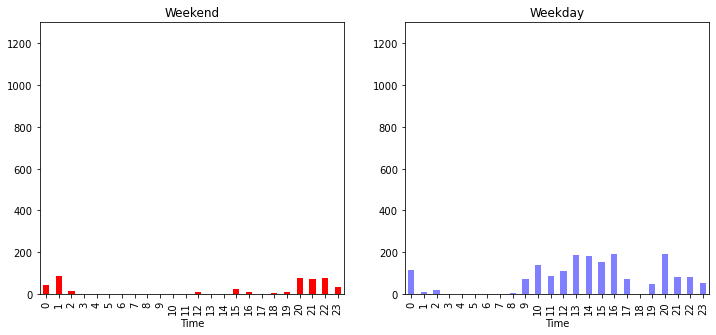

In [29]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


In [30]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

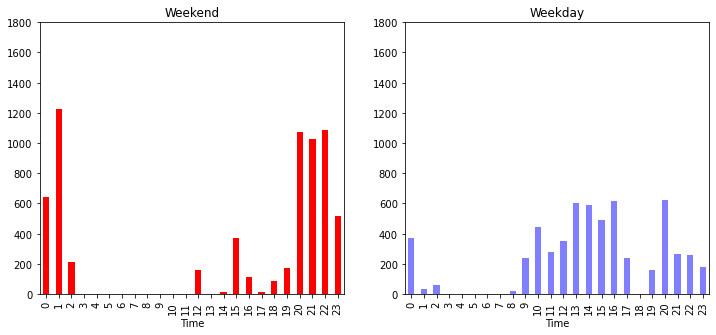

In [31]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [32]:
df['domain'].value_counts()[:10]

www.google.com              685
webauth.umbc.edu            177
www.apple.com               161
github.com                  122
www.amazon.com              105
localhost:8888               97
myretrievercare.umbc.edu     67
mail.google.com              62
blackboard.umbc.edu          56
secure4.store.apple.com      55
Name: domain, dtype: int64

In [33]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [34]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

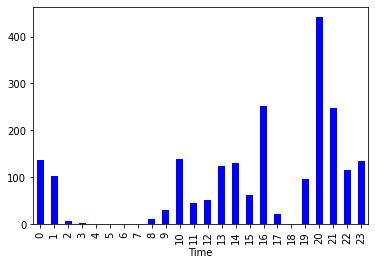

In [35]:
_= show_domain_stats('google', 'blue')

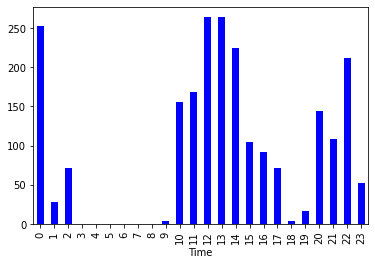

In [36]:
_= show_domain_stats('github|colab|umbc', 'blue')

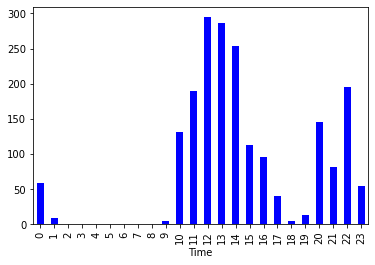

In [37]:
_= show_domain_stats('puma|under|umbc', 'blue')

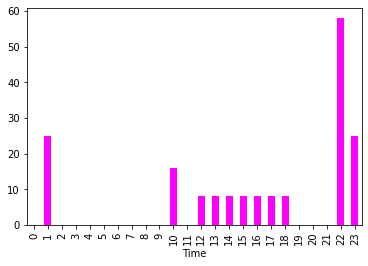

In [38]:
_ = show_domain_stats('youtube', 'magenta')


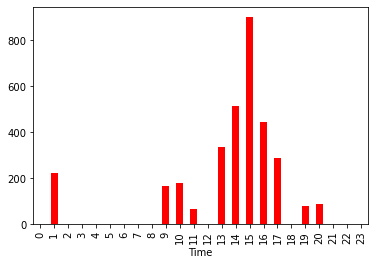

In [39]:
_ = show_domain_stats('apple', 'red')

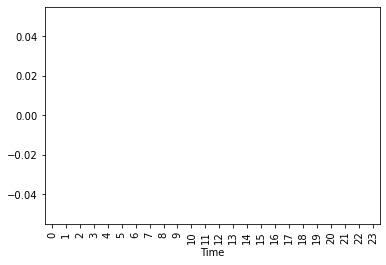

In [40]:
_ = show_domain_stats('netflix', 'red')

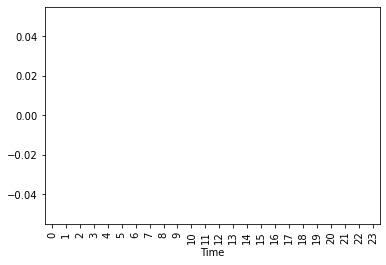

In [41]:
_ = show_domain_stats('netflix|disney|prime', 'red')

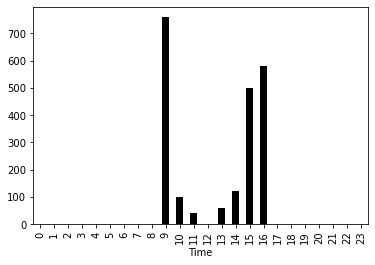

In [42]:
_=show_domain_stats('amazon', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

1. This is Work Computer
2. he/she is not employed 
3. Mostly he/she shows intrests on github,UMBC, Blackboard, Apple Website
4. he/she showing a intrest in  Apple product, other than than mostly prefered to work or study and spends less time at computer.& sleeping time is between 3 am to 8 pm